# ECE 5470 Lab 5 Report


## by Junjie Tian


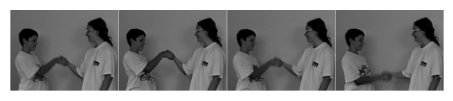

Four 'logo' sized frames from hand.vs
<scaled size: (226 x 1205) >


In [222]:
import numpy as np
from v4 import vx
from v4 import vd
# example display of selected frames
exec(vx.vxsh( 'vclip f=1 hand.vs of=dhand' )) 
for i in (6, 11, 15):
    exec(vx.vxsh( 'vclip f=$i hand.vs | vxfile of=dhand' ))
exec(vx.vxsh( 'vtile dhand n=4,1 -ib -xb of=dhandt' ))
vd.dispmvx("dhandt", size=0.7, capt="Four 'logo' sized frames from hand.vs")


### Section 2 Feature tracking
#### 2.1 Tracking Imge Features in Time


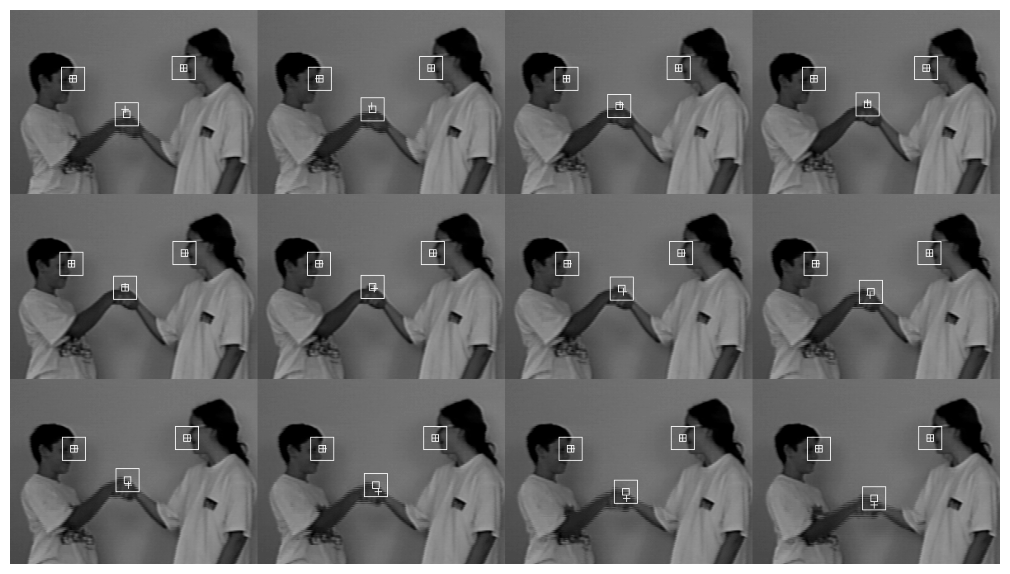

Tracked Hand.vx with three features defined by loc1
<scaled size: (672 x 1200) >


In [63]:
exec(vx.vxsh( 'vtrack if=hand.vs pf=loc1 h=10 v=10 of=trk.vs gf=trk.g' ))
exec(vx.vxsh('vtile trk.vs n=4,3 of=trkt.vs'))

vd.dispmvx('trkt.vs', size=1.8, capt="Tracked Hand.vx with three features defined by loc1" )

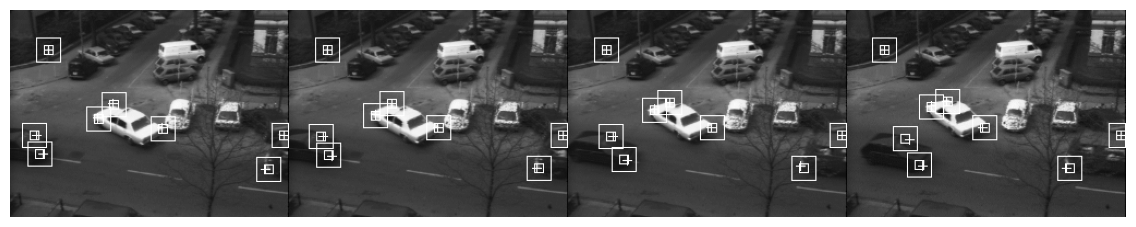

Four frames (1,4,9,14)from trk.vs
<scaled size: (190 x 1024) >


In [221]:
exec(vx.vxsh( 'vclip f=1 trk.vs of=dhand' )) 
for i in (4, 9, 14):
    exec(vx.vxsh( 'vclip f=$i trk.vs | vxfile of=dhand' ))
exec(vx.vxsh( 'vtile dhand n=4,1 of=dhandt' ))
vd.dispmvx("dhandt", size=1.8, capt="Four frames (1,4,9,14)from trk.vs")

### Discussion of the tracking results

In the tracking process, three features are tracked: a little right to the boy's eyes, a little left of the girl's nose, and the upper part of the shaking hands. The relative position of the '+' mark with respect to the small box is indicative of the moving direction and moving speed of the feature points. The boy's eyes and the girl's nose didn't move very fast, so the '+' mark is usually within the small box and oscillate in a small range in the moving direction. The hands moved fast, so the '+' mark sometimes is far away from the center of the small box or even out of the small box. The position of the '+' mark with respect to the center of the small box indicates the moving direction of the hands.
Overall, the tracking function does the job successfully.

In [54]:
exec(vx.vxsh( 'vpr trk.g' ))
# Save the csv file of the track
exec(vx.vxsh('vexcel -i -t trk.g of=tracked.csv'))

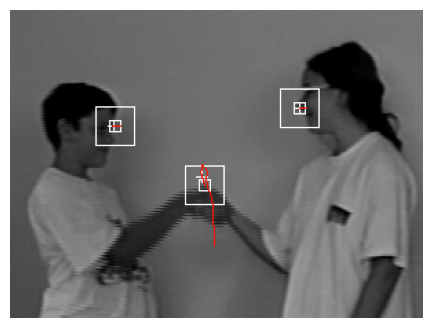

Time trajectories for the tracked feature points in 15 frames on first frame
<scaled size: (224 x 300) >


In [55]:
#  Create a binary image of the tracking trajectories. 
exec(vx.vxsh( 'vrend -w  trk.g of=trkt.vx' ))
#  Select the first image frame of the tracked results
exec(vx.vxsh( 'vclip f=1 if=trk.vs of=trk1.vx' ))
#  Add the tracking trajecctories as a color overlay
exec(vx.vxsh( 'vcmix  if=trk1.vx ig=trkt.vx | vccvt -i of=trkv.vx' ))
vd.dispmvx('trkv.vx', capt="Time trajectories for the tracked feature points in 15 frames on first frame")


### Discussion of Section 2.1

Problem: The task is that we use 'vtrack' function to detect the motion track of targeted features. We also use 'vexcel' function to extract the moving path into excel file and plot the trajectory using red color. On the image sequence of the output, there is a large box indicating the size of the search area, a '+' sign indicating the location of the best match, and a small box indicating the location of a feature in the previous frame. The general moving track is discussed in the previous discussion section.

Tracking parameters selected:
1. pf: number of features and their initial x,y locations. Stored in loc1 file.
2. h=10: horizontal search size
3. v=10: vertical search size

Parameters analysis:
The parameter pf can be selected by looking at the original image sequence and locate the moving feature by eyes. To make the tracking function work, we can estimate the rough point and the algorithm is able to detect the more precise location.
The parameters h and v are chosen such that the numbers are larger than the moving range of the feature. I explored 4 sets of parameters. In the exploration of these two parameters below, I find out that if h and v are half as the original value (both = 5), the tracking of the moving hands is not very accurate as the hands move fast and move out of the larger box at later frames. If h and v are both 7.5, the result is more accurate than h=5 and v=5 but still less accurate than h=10 and v=10. If h=20 and v=20, the result is accurate. However, it is not necessary to make the searching range so large as the computation cost will increase. h=10 and v=10 is enough. As the hands move more in vertical direction than horizontal direction, I try h=10 and v=20. The result is accurate. I think maybe we could use h different from v when objects move more in one direction than the other.

Motion analysis:
The maximum motion occurs in the vertical direction (y-direction) of moving hands. Across the whole time frame, the y location of it increases from 96 to 111 then decreases to 51 at last. The maximum difference in location index is 111-51=60. Overall the motion is irregular as the moving speed of features is not constant.

Challenges:
1. There are shadows of the object on the wall, which may affect the accuracy of the algorithm.
2. The pixels of hands are relatively clear in the beginning but becomes more blurry at the end. This makes the tracking task harder.

Results:
When the parameters of h and v are smaller than the maximum object motion range, the tracking is not accurate. When h and v are equal to numbers larger than or equal to 10, the measurements are relatively precise. However, the tracking of the hands is less accurate than the other two features, as hands move way faster than the other two features. The analysis of different parameters is shown in the above parts.

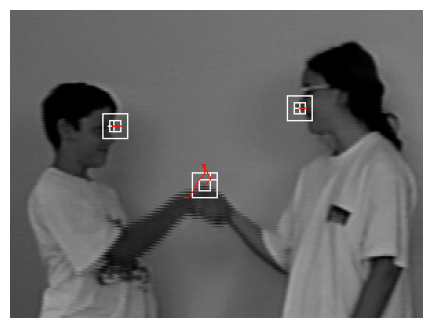

Time trajectories for the tracked feature points in 15 frames on first frame
<scaled size: (224 x 300) >


In [81]:
# Parameter exploration in tracing process
# parameters: h=5, v=5
exec(vx.vxsh( 'vtrack if=hand.vs pf=loc1 h=5 v=5 of=trk.vs gf=trk.g' ))
exec(vx.vxsh('vtile trk.vs n=4,3 of=trkt.vs'))
exec(vx.vxsh( 'vpr trk.g' ))
exec(vx.vxsh( 'vrend -w  trk.g of=trkt.vx' ))
exec(vx.vxsh( 'vclip f=1 if=trk.vs of=trk1.vx' ))
exec(vx.vxsh( 'vcmix  if=trk1.vx ig=trkt.vx | vccvt -i of=trkv.vx' ))
vd.dispmvx('trkv.vx', capt="Time trajectories for the tracked feature points in 15 frames on first frame")

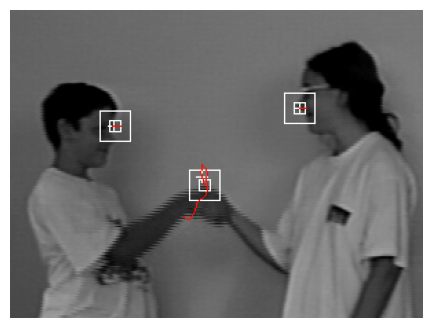

Time trajectories for the tracked feature points in 15 frames on first frame
<scaled size: (224 x 300) >


In [73]:
# parameters: h=7.5, v=7.5
exec(vx.vxsh( 'vtrack if=hand.vs pf=loc1 h=7.5 v=7.5 of=trk.vs gf=trk.g' ))
exec(vx.vxsh('vtile trk.vs n=4,3 of=trkt.vs'))
exec(vx.vxsh( 'vpr trk.g' ))
exec(vx.vxsh( 'vrend -w  trk.g of=trkt.vx' ))
exec(vx.vxsh( 'vclip f=1 if=trk.vs of=trk1.vx' ))
exec(vx.vxsh( 'vcmix  if=trk1.vx ig=trkt.vx | vccvt -i of=trkv.vx' ))
vd.dispmvx('trkv.vx', capt="Time trajectories for the tracked feature points in 15 frames on first frame")

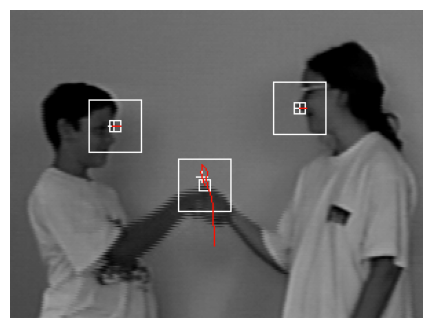

Time trajectories for the tracked feature points in 15 frames on first frame
<scaled size: (224 x 300) >


In [74]:
# parameters: h=15, v=15
exec(vx.vxsh( 'vtrack if=hand.vs pf=loc1 h=15 v=15 of=trk.vs gf=trk.g' ))
exec(vx.vxsh('vtile trk.vs n=4,3 of=trkt.vs'))
exec(vx.vxsh( 'vpr trk.g' ))
exec(vx.vxsh( 'vrend -w  trk.g of=trkt.vx' ))
exec(vx.vxsh( 'vclip f=1 if=trk.vs of=trk1.vx' ))
exec(vx.vxsh( 'vcmix  if=trk1.vx ig=trkt.vx | vccvt -i of=trkv.vx' ))
vd.dispmvx('trkv.vx', capt="Time trajectories for the tracked feature points in 15 frames on first frame")

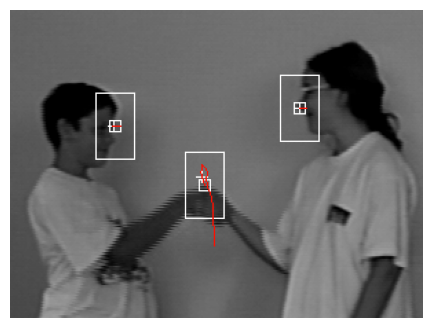

Time trajectories for the tracked feature points in 15 frames on first frame
<scaled size: (224 x 300) >


In [75]:
# parameters: h=10, v=20
exec(vx.vxsh( 'vtrack if=hand.vs pf=loc1 h=10 v=20 of=trk.vs gf=trk.g' ))
exec(vx.vxsh('vtile trk.vs n=4,3 of=trkt.vs'))
exec(vx.vxsh( 'vpr trk.g' ))
exec(vx.vxsh( 'vrend -w  trk.g of=trkt.vx' ))
exec(vx.vxsh( 'vclip f=1 if=trk.vs of=trk1.vx' ))
exec(vx.vxsh( 'vcmix  if=trk1.vx ig=trkt.vx | vccvt -i of=trkv.vx' ))
vd.dispmvx('trkv.vx', capt="Time trajectories for the tracked feature points in 15 frames on first frame")

#### 2.2 Tracking image annotation landmarks 


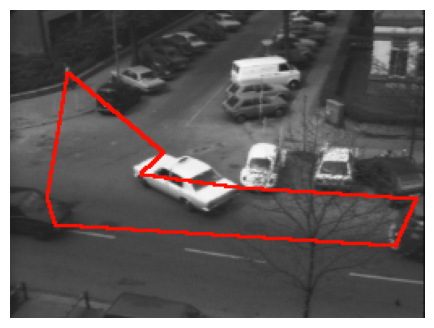

<scaled size: (190 x 256) >


In [100]:
exec(vx.vxsh('vbbloc if=taxi.1.bb -vt -d2 of=loc2 ol=taxi.2.bb'))
exec(vx.vxsh('vclip f=1 taxi.vs of=taxif1'))
exec(vx.vxsh('vrend -w taxi.1.bb | vmorph s=2 -d of=taxit1'))
exec(vx.vxsh('vcmix if=taxif1 ig=taxit1 of=taxilm.vx'))
vd.dispmvx('taxilm.vx')

Comment: The targeted points are shown in the above picture. It is presented in the form of a closed boundary, and each turning point is a tracking location.
Reason of choosing these points:
point 1: the person walking on the road. The purpose is to track the motion of smaller objects.
point 2-4: the front edge, behind edge, and tire of the white car. Three points are choosing to track the car in different positions and test the algorithm's ability of tracking points in different shape and colors.
point 5-6: the two front edges of the black truck. I want to track this large object and I choose two darker points on purpose to test the ability of the algorithm in tracking points with color similar to the background (the tree and the road are both in darker color).
point 7-8: one point on the front edge of the black car and one point on the front glass of the car. These two different types of points are chosen to track this object.

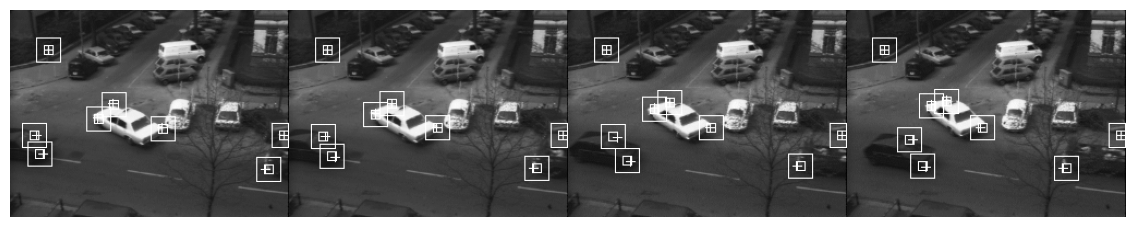

Four frames (1,6,11,15)from trk.vs
<scaled size: (190 x 1024) >


In [107]:
exec(vx.vxsh( 'vtrack if=taxi.vs pf=loc2 h=7.5 v=7.5 of=trk.vs gf=trk.g' ))
exec(vx.vxsh( 'vclip f=1 trk.vs of=dcar' )) 
for i in (5, 10, 15, 20):
    exec(vx.vxsh( 'vclip f=$i trk.vs | vxfile of=dcar' ))
exec(vx.vxsh( 'vtile dcar n=4,1 of=dcart' ))
vd.dispmvx("dcart", size=1.8, capt="Four frames (1,6,11,15)from trk.vs")

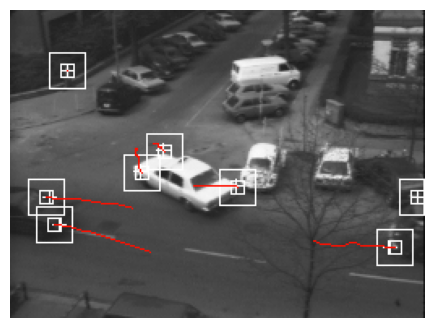

Time trajectories for the tracked feature points in 15 frames on first frame
<scaled size: (190 x 256) >


In [108]:
exec(vx.vxsh('vtile trk.vs n=4,3 of=trkt.vs'))
exec(vx.vxsh( 'vpr trk.g' ))
exec(vx.vxsh( 'vrend -w  trk.g of=trkt.vx' ))
exec(vx.vxsh( 'vclip f=1 if=trk.vs of=trk1.vx' ))
exec(vx.vxsh( 'vcmix  if=trk1.vx ig=trkt.vx | vccvt -i of=trkv.vx' ))
vd.dispmvx('trkv.vx', capt="Time trajectories for the tracked feature points in 15 frames on first frame")

Comment: Generally, the performance of the algorithm is good. However, there are some points that are not tracked as expected.
The person: the movement of the person is detected. However, the tracked trajectory is shorter than the actual movement; in the last few frames, the movement is not tracked. The possible reason is that the person is very small and has similar dark pixels as the background. Thus, the algorithm cannot detect the movement clearly.
The three point of the white car: The motion of the front two points are detected and the curving trajectory is as expected as the white car is turning right. However, the motion of the point on the rear edge is not detected clearly. The trajectory shown is a straight line. The possible reason is that the rear part of the car is all in white and the algorithm fails to tell the difference between the motion of one corner and the rest of the white parts. Thus, a straight trajectory is shown.
Two points of the truck: One of the point has shown clear trajectory, and it is relatively accurate. However, the motion of the other point is not detected at all. The possible reason is that the point is on the whole black part on the top of the truck. In all frames, that point and the surrounding points are in black color, so no motion is detected. A possible improvement is that we could track the motion on the corner. However, similar problem occurs after I made the change. Possible reason is that the color of the point is too similar to the background.
Two points of the black car: the trajectory of both points are tracked successfully.

My reason of choosing the parameter h=v=7.5: this number is larger than the motion range of all the targeted points and not too large to make the computational cost high.

### 3 Temporal Domain Filtering
<span style="color:cornflowerblue"> Start your discussion for section 4 here, add additional cells for 
image display etc. as needed</span>


In [109]:
exec(vx.vxsh('vssump hand.vs n=3 of=hand.m'))

Comment: The temporal mean filter calculates the average pixel value of the current frame and n-1 frames after the current frame. In this case, n=3. The range of the motion in the output image is smaller than the original image, as the bigger movement is averaged out across the surrounding frames.

In [110]:
exec(vx.vxsh('vssump hand.vs n=5 of=hand.m5'))

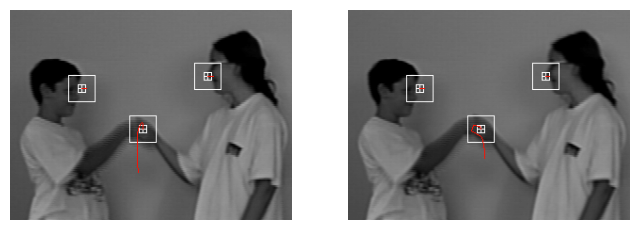

The trajectory of n=3 and n=5 in vssump
<scaled size: (224 x 300) (224 x 300) >


In [121]:
exec(vx.vxsh( 'vtrack if=hand.m pf=loc1 h=10 v=10 of=trk3.vs gf=trk3.g' ))
exec(vx.vxsh( 'vpr trk3.g' ))
exec(vx.vxsh( 'vrend -w  trk3.g of=trkt3.vx' ))
exec(vx.vxsh( 'vclip f=1 if=trk3.vs of=trk13.vx' ))
exec(vx.vxsh( 'vcmix  if=trk13.vx ig=trkt3.vx | vccvt -i of=trkv3.vx' ))

exec(vx.vxsh( 'vtrack if=hand.m5 pf=loc1 h=10 v=10 of=trk5.vs gf=trk5.g' ))
exec(vx.vxsh( 'vpr trk5.g' ))
exec(vx.vxsh( 'vrend -w  trk5.g of=trkt5.vx' ))
exec(vx.vxsh( 'vclip f=1 if=trk5.vs of=trk15.vx' ))
exec(vx.vxsh( 'vcmix  if=trk15.vx ig=trkt5.vx | vccvt -i of=trkv5.vx' ))
vd.dispmvx('trkv3.vx','trkv5.vx', capt='The trajectory of n=3 and n=5 in vssump')

Comment: In the larger window size, the average of more frames are calculated so the 'averaging effect' is stronger. The range of the motion is expected to be smaller and some details in motion trajectory may not be very accurate. When we place two trajectories together, we can see that the motion of the hands is less accurate when n=5 as the trajectory doesn't go up and down in a length as expected. This is due to the 'averaging effect'. For n=3, the situation is better.

### Another Part: vsmed function on hand.vs

In [149]:
exec(vx.vxsh('vsmed hand.vs n=3 of=hand.median'))

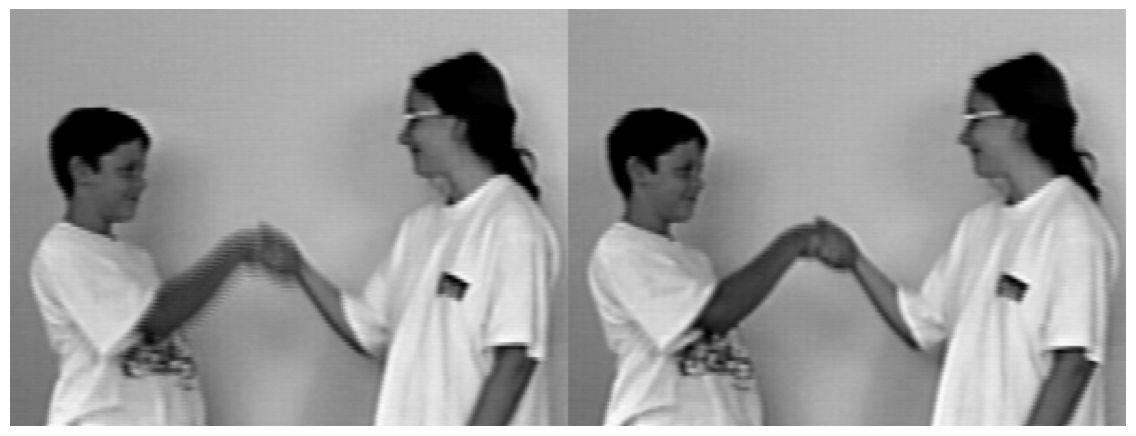

Some frames in mean filter output
<scaled size: (224 x 600) >


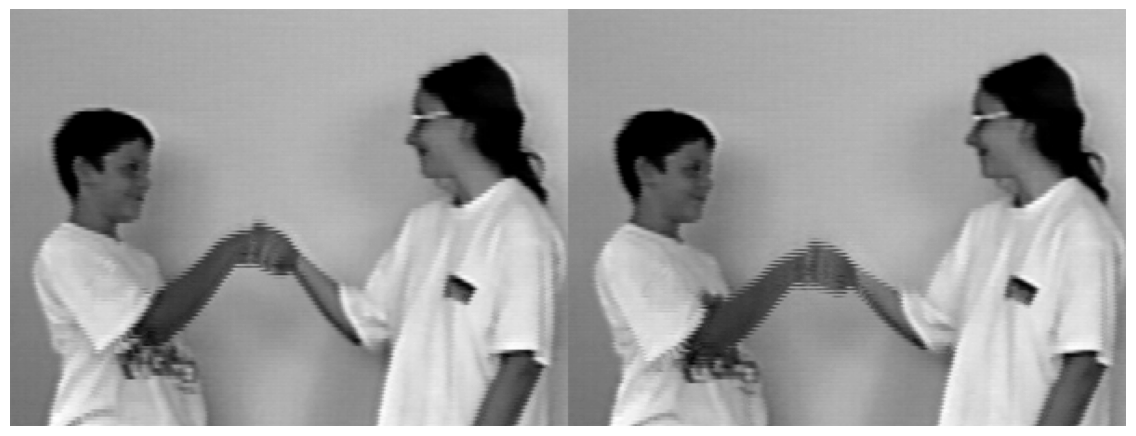

Some frames in median filter output
<scaled size: (224 x 600) >


In [223]:
# compare the results from median and mean filters

for i in (7, 12):
    exec(vx.vxsh( 'vclip f=$i hand.m | vxfile of=dhand.m' ))
exec(vx.vxsh( 'vtile dhand.m n=2,1 of=dhandt.m' ))
vd.dispmvx('dhandt.m', size=1.8, capt='Some frames in mean filter output')

for i in (7, 12):
    exec(vx.vxsh( 'vclip f=$i hand.median | vxfile of=dhand.median' ))
exec(vx.vxsh( 'vtile dhand.median n=2,1 of=dhandt.median' ))
vd.dispmvx('dhandt.median', size=1.8, capt='Some frames in median filter output')


Comment: Comparing the result of the mean and median filtering, I show two frames of each filtering above. The output image of the median filter is more blurry on the edges, especially in the arm part. The possible reason is that when calculating the median at one position, it is possible that we have two 0's and one non-zero value. The median is zero and the pixel is assigned a white pixel in the output. However, such case won't happen in mean filter, as the average of the three numbers is a small but non-zero value. Thus, the edges of arms are more blurry in the median filter.

### Another Part: vsmed function on lb5.vs

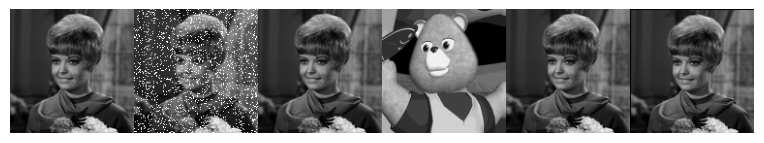

lb5.vs image sequence
<scaled size: (128 x 768) >


In [167]:
#Visualization of the lb5.vs image sequence
exec(vx.vxsh( 'vtile lb5.vs n=6,1 of=lb5.vt' ))
vd.dispmvx('lb5.vt', size=1.2, capt='lb5.vs image sequence')

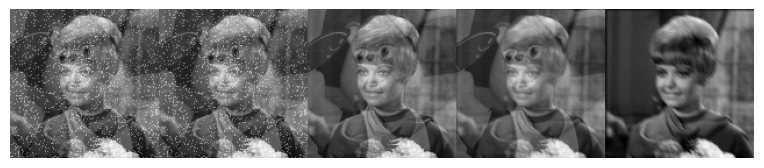

lb5.mean image sequence
<scaled size: (128 x 640) >


In [174]:
#Visualization of the output of mean filter
exec(vx.vxsh('vssump lb5.vs n=3 of=lb5.mean'))
exec(vx.vxsh( 'vtile lb5.mean n=5,1 of=lb5.vt' ))
vd.dispmvx('lb5.vt', size=1.2, capt='lb5.mean image sequence')

Explanation: There are mosaic in the first two output images as the picture containing mosaic is included in the mean filter. The mark of the mosaic is lighter as the pixel value of white pixel is averaged by the other two images. We can see the shades of the bear in the second, third, and fourth output image, especially the eyes and nose, as the color of these parts are darker and will affect the pixel value of the output image. The last image is clear as only the images of the girl itself are included in the algorithm.

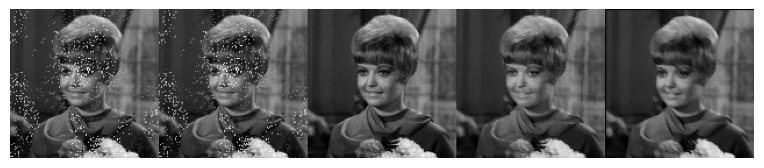

lb5.median image sequence
<scaled size: (128 x 640) >


In [175]:
#Visualization of the output of median filter
exec(vx.vxsh('vsmed lb5.vs n=3 of=lb5.median'))
exec(vx.vxsh( 'vtile lb5.median n=5,1 of=lb5.vt' ))
vd.dispmvx('lb5.vt', size=1.2, capt='lb5.median image sequence')

Explanation: There are mosaics in the first two output images as the mosaic picture is included in the calculation. However, the mosaic mark is less than in mean filter, as it is not likely that a very light pixel becomes the median of three pictures. There is a key difference in the output of the last three images. The shape of the bear cannot be seen at all. The reason is that a frame calculated by 3 images with two identical images is exactly same as the identical image.

### 4 Change Detection


In [234]:
exec(vx.vxsh('vsdif if=taxi.vs th=1 of=taxi.dif-1'))
exec(vx.vxsh('vsdif if=taxi.vs th=2 of=taxi.dif-2'))
exec(vx.vxsh('vsdif if=taxi.vs th=5 of=taxi.dif-5'))
exec(vx.vxsh('vsdif if=taxi.vs th=10 of=taxi.dif-10'))
exec(vx.vxsh('vsdif if=taxi.vs th=15 of=taxi.dif-15'))

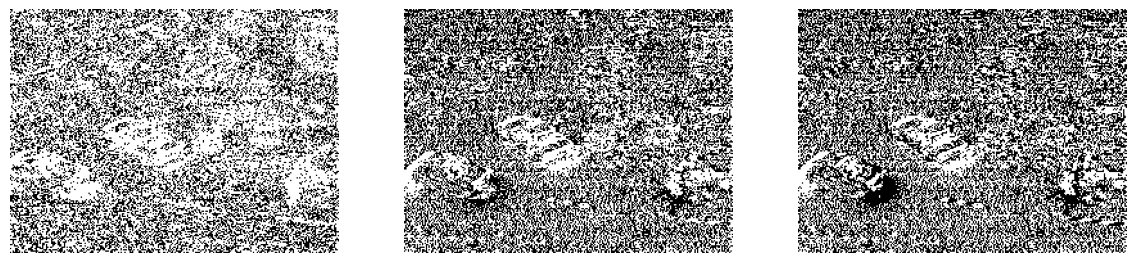

A frame when threshold = 1, 5, 10
<scaled size: (190 x 256) (190 x 256) (190 x 256) >


In [245]:
i=10
exec(vx.vxsh( 'vclip f=$i taxi.dif-1 | vxfile of=dtaxi.dif-1' ))
exec(vx.vxsh( 'vtile dtaxi.dif-1 n=1 of=dtaxit.dif-1' ))
exec(vx.vxsh( 'vclip f=$i taxi.dif-5 | vxfile of=dtaxi.dif-5' ))
exec(vx.vxsh( 'vtile dtaxi.dif-5 n=1 of=dtaxit.dif-5' ))
exec(vx.vxsh( 'vclip f=$i taxi.dif-10 | vxfile of=dtaxi.dif-10' ))
exec(vx.vxsh( 'vtile dtaxi.dif-10 n=1 of=dtaxit.dif-10' ))
vd.dispmvx('dtaxit.dif-1','dtaxit.dif-5','dtaxit.dif-10', size=1.8, capt='A frame when threshold = 1, 5, 10')


Discussion: The best threshold value is th=5. When th=1, there are too many white pixels in the background, which makes visualizing the motion of the moving object very hard. Besides, if we scroll very fast in the vsimva viewer, I notice that when th=5, I can see the static objects in the background being white and their shapes are visible. However, when th=1, there are too many white pixels; when th=10, there are too many black pixels. In these cases, it is hard to see the static background objects' shapes. Lastly, when th=5, the shape of the three cars is clearer than when th is equal to a lower or higher value. Thus, the best threshold is th=5.

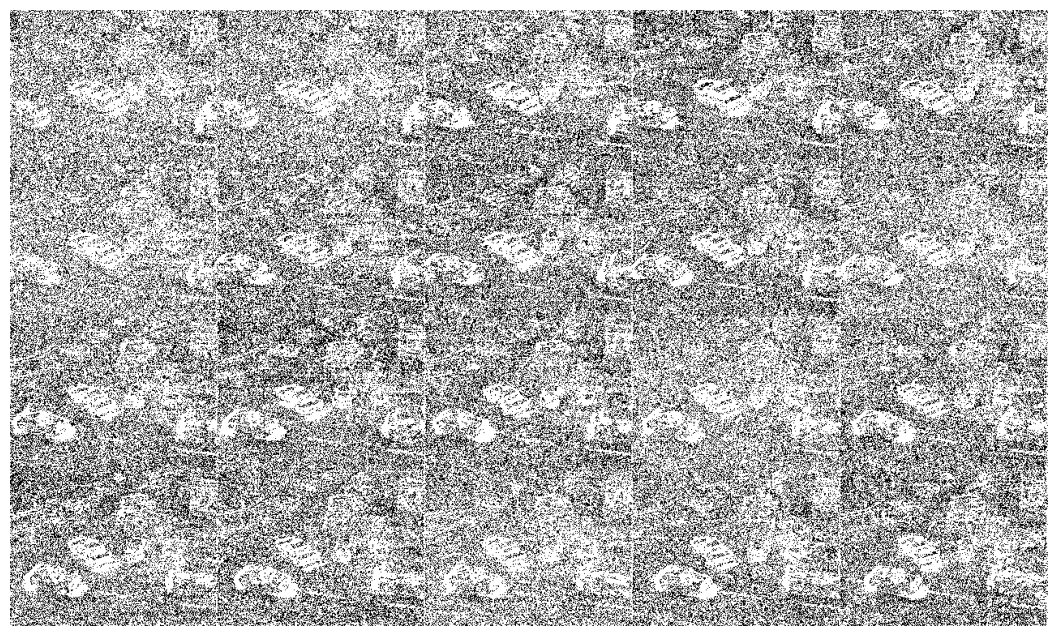

<scaled size: (760 x 1280) >


In [254]:
exec(vx.vxsh( 'vtile taxi.dif-1 n=5,4 of=taxi_out.vt' ))
vd.dispmvx('taxi_out.vt',size=2)